## Bootstrap replicates
in other words repeating the same experiment for a given number of times.

In [1]:
# importing required modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# runing the functions script
%run stats_func.py

In [2]:
# loading the iris dataset
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# extracting sepal length and sepal width for further analysis
sepalLength = np.array(df['SepalLengthCm'])
sepalWidth = np.array(df['SepalWidthCm'])

For further experiments Sepal Length variable will be used. Additionally, we will focus on bootstrap technique used for mean.

In [4]:
# calculating the mean from data
np.mean(sepalLength)

5.8433333333333337

### Use of numpy.random.choice for bootstraping
For the boostraping technique we will use numpy.random.choice function that will randomly select the data from a given variable forming a new data set. Then a function of choice can be used to calculate required statistics. In our case it will be mean value.

The code of the function:

    def bootstrap_replicate_1d(data, func):
        '''Generate bootstrap replicate of 1D data'''
        bs_sample = np.random.choice(data, len(data))
        return func(bs_sample)

To show the impact of the function on the mean value, the function is called three times in the cells below:

In [5]:
bootstrap_replicate_1d(sepalLength, np.mean)

5.8513333333333337

In [6]:
bootstrap_replicate_1d(sepalLength, np.mean)

5.8300000000000001

In [7]:
bootstrap_replicate_1d(sepalLength, np.mean)

5.7560000000000002

It would be interesting to repeat call of **boostrap_replicate_1d** function many times to see how the mean value changes. For that reason another function is defined:

    def draw_bs_reps(data, func, size=1):
        """Draw bootstrap replicates."""
        # Initialize array of replicates: bs_replicates
        bs_replicates = np.empty(size)

        # Generate replicates
        for i in range(size):
            bs_replicates[i] = bootstrap_replicate_1d(data, func)

        return bs_replicates

In the example we will call the **boostrap_replicate_1d** function 10,000 times.

In [8]:
bs_replicates = draw_bs_reps(sepalLength, np.mean, size=10000)

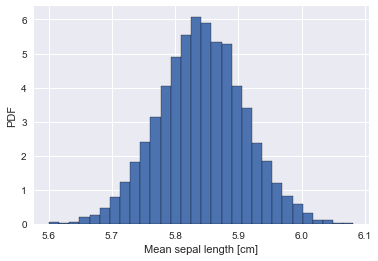

In [9]:
# histogram plot will show us how the mean value of sepal length changes when the experiment is repeated 10,000 times
plt.hist(bs_replicates, bins=30, normed=True, edgecolor='black')
plt.xlabel("Mean sepal length [cm]")
plt.ylabel('PDF');

In [10]:
# calculating 95% confidence interval for the mean based on boostrap technique
conf_intervals = np.percentile(bs_replicates, [2.5, 97.5])
conf_intervals

array([ 5.70866667,  5.97735   ])

Repeating the same exercise for Sepal Width

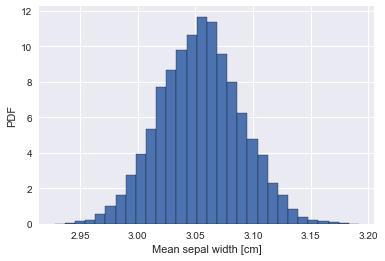

In [11]:
bs_replicates2 = draw_bs_reps(sepalWidth, np.mean, size=10000)

# histogram plot will show us how the mean value of sepal width changes when the experiment is repeated 10,000 times
plt.hist(bs_replicates2, bins=30, normed=True, edgecolor='black')
plt.xlabel("Mean sepal width [cm]")
plt.ylabel('PDF');

In [12]:
# calculating 95% confidence interval for the mean based on boostrap technique
conf_intervals2 = np.percentile(bs_replicates2, [2.5, 97.5])
conf_intervals2

array([ 2.98665   ,  3.12466667])